In [1]:
%matplotlib inline
from nansat import *
from cmocean import cm
from IPython.display import Image

In [2]:
n_arc = Nansat(
    '/vagrant/shared/test_data/cmems/ARC-METNO-ARC-TOPAZ4_2_PHYS-FOR-TDS-x20-X80-y60-Y90-20170520-20170530.nc')

In [3]:
n_siw = Nansat(
    '/vagrant/shared/test_data/cmems/SIW-DMI-ARC-SEAICE_TEMP-OBS-TDS-x0-X100-y60-Y90-20170520-20170525.nc')

=>Arctic Sea and Ice Surface Temperature, L4, 5km daily  (DMI-ARC-SEAICE_TEMP-L4-NRT-OBS)<=


In [4]:
d = Domain('+proj=stere +lon_0=55 +lat_0=75 +no_defs',
           '-te -1000000 -1000000 1000000 1000000 -tr 10000 10000')

n_arc.reproject(d)
n_siw.reproject(d)

In [5]:
fice = n_arc['fice_004']
sic = n_siw['sea_ice_fraction_004']

In [6]:
nmap = Nansatmap(n_siw, resolution='l')
nmap.imshow(sic, vmin=0, vmax=1, cmap=cm.ice)
nmap.add_colorbar(shrink=0.5)
nmap.save('sic_map.png', dpi=300)
nmap.imshow(fice, vmin=0, vmax=1, cmap=cm.ice)
nmap.save('fice_map.png', dpi=300)
plt.close('all')

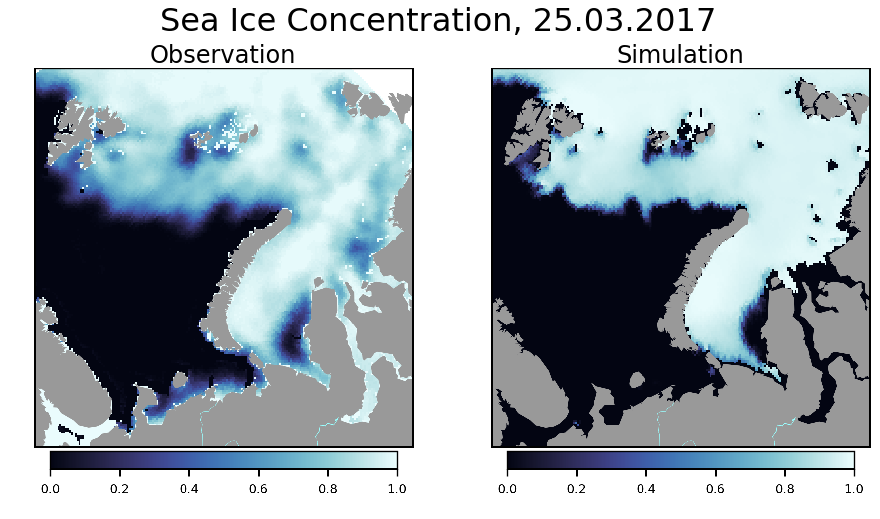

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
ax[0].imshow(plt.imread('sic_map.png'))
ax[0].axis('off')
ax[0].set_title('Observation', fontsize=24)
ax[1].imshow(plt.imread('fice_map.png'))
ax[1].axis('off')
ax[1].set_title('Simulation', fontsize=24)
t = plt.suptitle('Sea Ice Concentration, 25.03.2017', fontsize=32)

In [8]:
nmap = Nansatmap(n_siw, resolution='l')
nmap.imshow(n_arc['hice'], vmin=0, vmax=1.5)
nmap.add_colorbar(shrink=0.5)
nmap.save('hice00_map.png', dpi=300)
nmap.imshow(n_arc['hice_010'], vmin=0, vmax=1.5)
nmap.save('hice10_map.png', dpi=300)
plt.close('all')

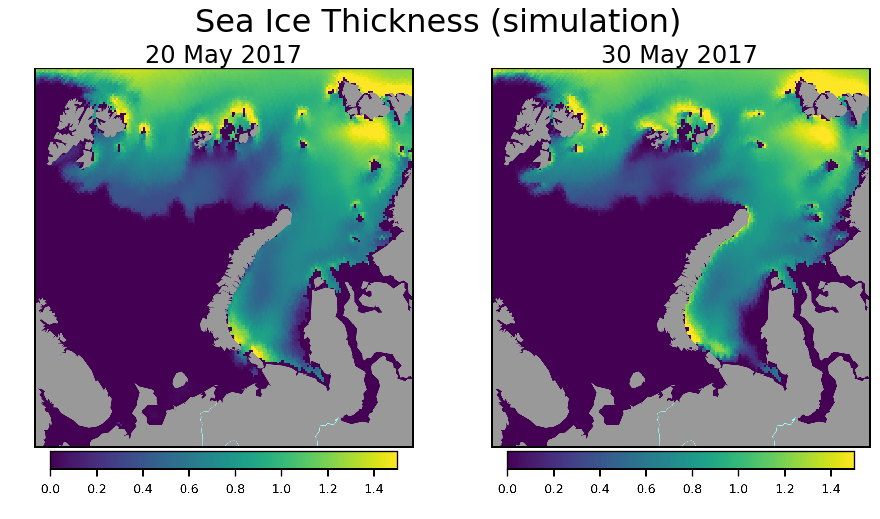

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
ax[0].imshow(plt.imread('hice00_map.png'))
ax[0].axis('off')
ax[0].set_title('20 May 2017', fontsize=24)
ax[1].imshow(plt.imread('hice10_map.png'))
ax[1].axis('off')
ax[1].set_title('30 May 2017', fontsize=24)
t = plt.suptitle('Sea Ice Thickness (simulation)', fontsize=32)